## Vilnius real estate used Apartment market analysis

* Purpose: analyse Vilnius real estate pricing changes during Covid-19 and post-Covid period (est. 2020.05-2020.08)
* Hypothesis: The uncertainty brought by Covid-19 should bring fluctuations in Vilnius real estate markets.
* Predictions:
  * 1. Increase in supply for apartments selling due to short-term rent demand drop and potential purchases hesitation due to market changes.
  * 2. Decrease in prices due to plummeting demand and potential increase of supply.

* Scope: data from one of main the Lithuanian real estate market portals used.
* Data loaded weekly to monitor market changes.
* New apartments (year > 2019) are excluded from analysis as only partial data of their full supply and pricing are  available.
* only furnished apartments are included in the analysis.  
### Weak points
* The apartments being sold data is available from April. A better picture would have been having the data from as early as January.
* The apartments being rented data is available from May. A better picture would also require early data, such as start of 2020.
* Spikes in weeks' data possible. Preferred way would be to load data daily and smooth out edges with weekly averages. Daily scrapping is out of scope owever.
* Data is based on posts and not actual objects in the market. There exists a practice of same object(apartment) postings in multiple districts (to make the object more visible and sell faster), that contributes to duplicate data. This duplicate data for the moment remains in dataset to support analysis splitting data into districts. 
* More sources could be included for analysis. This however can also result in duplicates.


### Importing  & initial preparation of data

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from toai.imports import *
%matplotlib notebook
#%matplotlib inline
import data_prep
import plotly
from plotly.offline import plot, iplot
import plotly.express as px
plotly.__version__
import plotly.graph_objects as go
from plotly.subplots import make_subplots

C:\Users\tiesi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\tiesi\Anaconda3\lib\site-packages\toai\imports.py:79: UserWarning: Could not find kaggle.json. Make sure it's located in C:\Users\tiesi\.kaggle. Or use the environment method.
  warnings.warn(str(error))


In [2]:
df_raw = data_prep.create_df_raw()

#first we will start with used apartments (built before 2019)
#df_raw = df_raw[df_raw['year']<2019]
df_raw.head()

,log_date,district,street,year,total_price,price_sq_m,nr_rooms,space_sq_m,floor,nr_floors,week,state
ID,,,,,,,,,,,,
1,2020-04-09,Antakalnis,Ajerų g.,2019,105000,1010.0,4,104.00,1,2,15,1
2,2020-04-09,Antakalnis,Ajerų g.,2018,130000,1143.0,4,113.69,1,2,15,1
3,2020-04-09,Antakalnis,Antakalnio g.,2000,114000,1713.0,2,66.54,4,4,15,2
4,2020-04-09,Antakalnis,Antakalnio g.,1964,83000,1413.0,3,58.75,5,5,15,2
5,2020-04-09,Antakalnis,Antakalnio g.,1967,99000,1378.0,3,71.86,5,5,15,2


####  Removing the outlayers
* Quantiles will be calculated individually for each day when the data was collected. Bottom 1 and top 1 % of the data will be removed.


In [3]:
# Building table without outlyers and aggregated statistics table
df, df_agg = data_prep.create_df(df_raw)

<IPython.core.display.Javascript object>


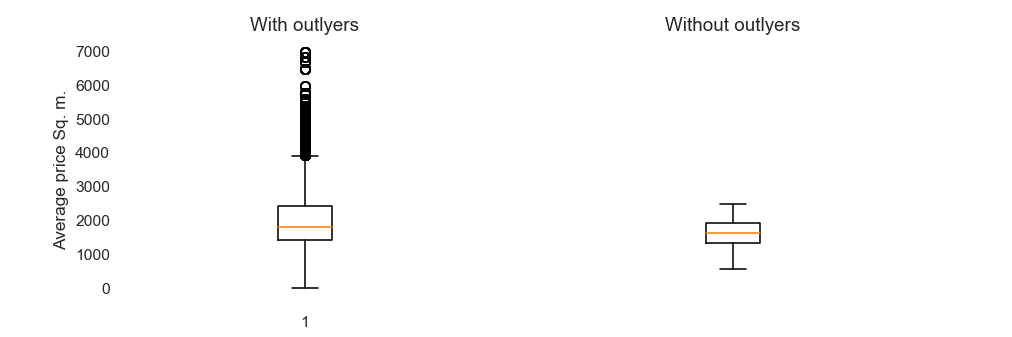

In [6]:

fig1 = plt.figure('Posts distribution Boxplot review',figsize=(9,3))
ax1 = plt.subplot(1, 2, 1)
plt.boxplot(df_raw['price_sq_m'])
plt.ylabel('Average price Sq. m.')
plt.title('With outlyers')
#ax1.grid()
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.boxplot(df['price_sq_m'])
plt.title('Without outlyers')
plt.axis('off')

plt.show()

<IPython.core.display.Javascript object>


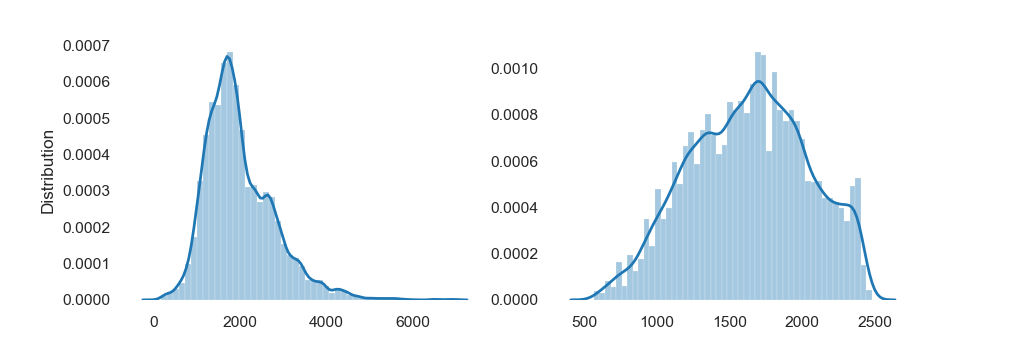

In [7]:
fig2 = plt.figure('Posts distribution plot review', figsize=(9,3))
ax3 = plt.subplot(1, 2, 1)
sns.distplot(df_raw['price_sq_m']);
plt.ylabel('Distribution')
plt.xlabel('Average price Sq. m.')
#plt.title('With outlyers')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax4 = plt.subplot(1, 2, 2)
sns.distplot(df['price_sq_m']);
plt.xlabel('Average price Sq. m.')
#plt.boxplot(df['price_sq_m'])
#plt.title('Without outlyers')
#plt.axis('off')
plt.show()

In [29]:

fig = make_subplots(specs=[[{"secondary_y": True}]])#this a one cell subplot

x = df_agg.index
y = df_agg['Mean']
yy = df_agg['nr_objects']

trace1 = go.Bar(x=x,
                y=y,
                name='Avg. Price per square meter',            
                marker=dict(color= 'rgba(0,0,255, 0.8)', 
                            line= dict(width= 1)))
 

trace2 = go.Scatter(x=x, 
                    y=yy, 
                    marker= dict(line= dict(width= 1), 
                           size= 8), 
                    line=dict(color= '#B0122C', width= 1.5),
                    name= 'Number of objects')

#The first trace is referenced to the default xaxis, yaxis (ie. xaxis='x1', yaxis='y1')
fig.add_trace(trace1, secondary_y=False);

#The second trace is referenced to xaxis='x1'(i.e. 'x1' is common for the two traces) 
#and yaxis='y2' (the right side yaxis)

fig.add_trace(trace2, secondary_y=True);

# fig.update_layout(autosize= False, 
#                   width= 700, 
#                   height= 500, 
#                   legend= dict(x=1.15, 
#                                y=1),
#                   hovermode='x');
# fig.update_xaxes(tickangle= -45, 
#                  autorange=True,
#                  tickfont=dict(size= 10), 
#                  title= 'Tournaments', 
#                  type= 'category');

fig.update_yaxes(range= [1600, 1680], #left yaxis
                 title= 'Average Price per square meter', secondary_y=False);
fig.update_yaxes(range= [2100, 2500],#right yaxis
                 showgrid= False, 
                 title= 'Number of objects',
                 secondary_y=True);

fig.update_layout(
    title="Number of posts vs average price per square meter",
    showlegend=False,
    annotations=[
        dict(
            x=15,
            y=1645,
            xref="x",
            yref="y",
            text="Quarantine extended to April 27th.",
            showarrow=True,
            arrowhead=7,
            ax=90,
            ay=-40
        ),  dict(
            x=25,
            y=1673,
            xref="x",
            yref="y",
            text="Nationwide Quarantine lifted",
            showarrow=True,
            arrowhead=7,
            ax=-65,
            ay=50
        )
        
    ]
     ,xaxis = dict(
        tickmode = 'linear',
        tick0 = 15,
        dtick = 1)
)
    
fig.show()

In [59]:
avg_price_change = abs(100-df_agg[df_agg.index==25]['Mean'].values*100/df_agg[df_agg.index==15]['Mean'].values)
avg_price_change = str(avg_price_change[0])[:4]

avg_price_change2 = abs(100-df_agg[df_agg.index==29]['Mean'].values*100/df_agg[df_agg.index==15]['Mean'].values)
avg_price_change2 = str(avg_price_change2[0])[:4]

avg_supply_change = abs(100-df_agg[df_agg.index==25]['nr_objects'].values*100/df_agg[df_agg.index==15]['nr_objects'].values)
avg_supply_change = str(avg_supply_change[0])[:5]

str1 = "The overall difference in average price per square meter between the start of this analysis (week 15th) and the end of quarantine in Lithuania appears trivial at "
str2 = "%. This small price change is now diminishing after the quarantine and is only "
print(str1+avg_price_change+str2+avg_price_change2+"%.")
print("The number of objects posted for sale however have increased much higher at "+avg_supply_change+"% and are remaining on higher levels after the quarantine is over.")
print("Generally we have a supply increase, however there is no evidence on any substantial price drops. It is likely that the suppliers are more prone to wait for demand rather than reduce the price.")
print("We need to slice the data to see whether certain segments are affected more than others.")

The overall difference in average price per square meter between the start of this analysis (week 15th) and the end of quarantine in Lithuania appears trivial at 1.22%. This small price change is now diminishing after the quarantine and is only 0.22%.
The number of objects posted for sale however have increased much higher at 16.58% and are remaining on higher levels after the quarantine is over.
Generally we have a supply increase, however there is no evidence on any substantial price drops. It is likely that the suppliers are more prone to wait for demand rather than reduce the price.
We need to slice the data to see whether certain segments are affected more than others.


In [ ]:
# plt.plot( 'log_date', 'Q1', data=quantiles_range, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'log_date', 'Q2', data=quantiles_range, marker='', color='olive', linewidth=2)
# plt.plot( 'log_date', 'Q3', data=quantiles_range, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

## Creation of data buckets for further analysis
* 3 Different apartment size buckets will be investigated:
  * < ~46 square meters. Small apartment category.
  * 46 to 66 square meters. Medium apartment category.
  * 66 to 120 square meters. Large apartment category.
* Categorization built based on Quantile-based discretization function towards three splits.

In [61]:
df['size_bucket'] = pd.qcut(df['space_sq_m'], q=3, labels=["small", "medium", "large"])
#df.groupby('size_bucket')['price_sq_m', 'space_sq_m'].agg(['mean', 'count', 'min', 'max'])

size_bucket_data = df.groupby(['size_bucket', 'week'])['price_sq_m'].agg(['mean', 'count'])
size_bucket_data = size_bucket_data.reset_index(level=['size_bucket', 'week'])
size_bucket_data = size_bucket_data.set_index('week')
size_bucket_data.rename(columns={'mean':'avg. price sq. m.',
                          'count':'nr. of posts',
                                }, 
                 inplace=True)
 
    

### Used apartments analysis (built year < 2019)

In [12]:
df_used = df[df['year']<2019]

In [62]:
fig = px.line(size_bucket_data, 
              x=size_bucket_data.index,
              y=size_bucket_data['nr. of posts'],
              color="size_bucket",
              title="Number of posts per size bucket")
fig.show()

In [63]:
import plotly.express as px

fig = px.line(size_bucket_data, 
              x=size_bucket_data.index,
              y=size_bucket_data['avg. price sq. m.'],
              color="size_bucket",
              title="Average price square meter per size bucket")
fig.show()

## District & street Rankings

In [66]:
#street ranking calculation
streets = df.groupby('street')['price_sq_m'].agg(['mean'])
streets['street_rank'] = pd.qcut(streets['mean'], q=5,  labels=[5, 4, 3,2,1])
#district ranking calculation
districts = df.groupby('district')['price_sq_m'].agg(['mean'])
districts['district_rank'] = pd.qcut(districts['mean'], q=5,  labels=[5, 4, 3,2,1])
                               
df = pd.merge(df, districts['district_rank'], on='district', how='outer')
df = pd.merge(df, streets['street_rank'], on='street', how='outer')

In [14]:
#df.head()

#districts.head
# districts_ranked = df.groupby('district_rank')['price_sq_m'].agg(['count','mean'])
# districts_ranked['district_rank2'] = pd.qcut(districts_ranked['mean'], q=10)
# districts_ranked.sort_values(by=['district_rank'])
#df.groupby('district_rank')['price_sq_m'].agg(['mean'])

#df['district']['district_rank'] == 1

df_test1 = df.groupby(['district','district_rank'])['price_sq_m'].agg(['mean','size'])
df_test1 = df_test1.dropna()

#df_test1[df_test1['district_rank']==1]
df_test1 = df_test1.reset_index()

In [18]:

#df
# #df['space_sq_m']
# #df = df.reset_index()
# df['size_bucket'] = df.apply(define_size_bucket, axis=1)
# #df2['district_bucket'] = df2.apply(define_district_bucket, axis=1)

In [39]:
# #buckets calculation:
# apartment_sizes = df.groupby(['size_bucket', 'log_date']).aggregate(np.mean)
# apartment_sizes = apartment_sizes.sort_values(by=['price_sq_m'], ascending=False)
# apartment_sizes.reset_index(inplace=True)  
# apartment_sizes = apartment_sizes.set_index('log_date')
# apartment_sizes.sort_index
# #apartment_sizes

In [37]:


# #small_ap = apartment_sizes[apartment_sizes['size_bucket']==1]
# #small_ap
# plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='1')
# #line_down = plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==2], label='2')
# #plt.legend([line_up, line_down]
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='3')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==4], label='4')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==5], label='5')
# #plt.ylabel('Mean')
# plt.show()
# #apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

                                    

In [15]:
#apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

## Correlation initial Analysis

In [15]:
#df.columns
potentialFeatures = [ 'year', 'total_price',
       'price_sq_m',  'nr_rooms', 'space_sq_m',
        'floor', 'nr_floors', 'street_rank', 'district_rank' ]
    #   'size_bucket', 'district_rank', 'street_rank']
# check how the features are correlated with the price  sq m
for f in potentialFeatures:
    related = df['price_sq_m'].corr(df[f])
    print("%s: %f" % (f,related))

year: -0.210678
total_price: 0.289889
price_sq_m: 1.000000
nr_rooms: -0.249378
space_sq_m: -0.282655
floor: -0.207742
nr_floors: -0.001015
street_rank: -0.870024
district_rank: -0.705089


<bound method Series.mean of 0        2
1        2
2        2
3        2
4        2
        ..
20014    2
20015    2
20016    2
20017    2
20018    2
Name: district_rank, Length: 20019, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]>

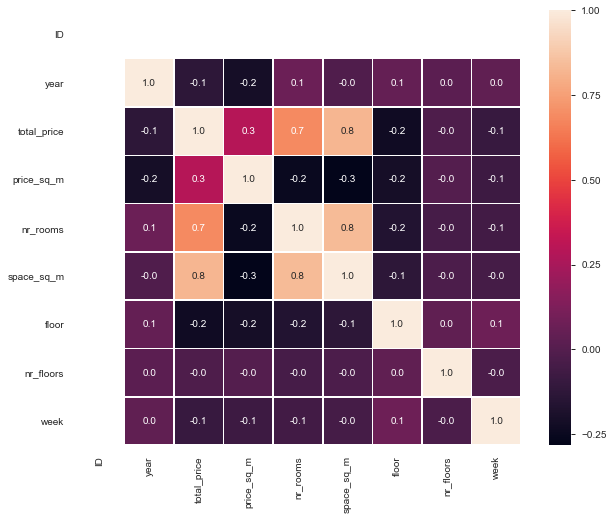

In [16]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [17]:
df.boxplot(column='price_sq_m', by='state')
df.price_sq_m.hist()

KeyError: 'state'

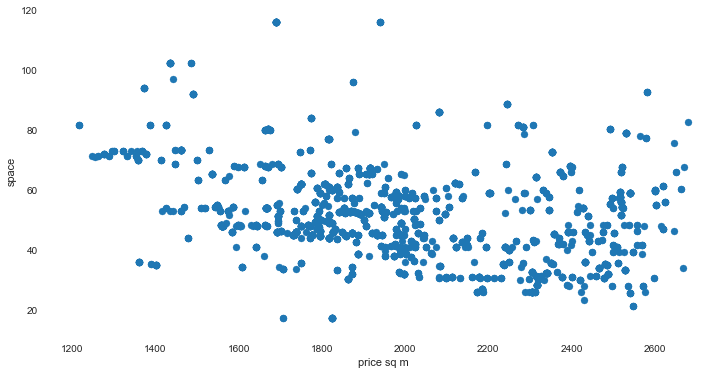

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['price_sq_m'], df['space_sq_m'])
ax.set_xlabel('price sq m')
ax.set_ylabel('space')
plt.show()

# Map work

In [64]:
import geopandas as gpd
import osmnx as ox
import networkx

Vilnius_map = "Vilnius,Lithuania"
graph = ox.graph_from_place(Vilnius_map)
networkx.classes.multidigraph.MultiDiGraph

nodes , streets_gdf = ox.graph_to_gdfs(graph)

In [67]:
streets_gdf2 = pd.DataFrame(streets_gdf)
streets_gdf2['street'] = streets_gdf2['name'].astype('str')
streets2 = streets2 = streets.iloc[:,:0]

streets_gdf2 = pd.merge(streets_gdf2, streets2, how='inner', left_on='street', right_on='street')
#streets_gdf2 = streets_gdf2[streets_gdf2['mean'].notnull()]
streets_gdf = gpd.GeoDataFrame(streets_gdf2, geometry='geometry')
streets_gdf = streets_gdf.reset_index()
distinct_streets = streets_gdf.groupby('name').index.agg(['min'])
streets_gdf = pd.merge(streets_gdf, distinct_streets, how='inner', left_on='index', right_on='min')

In [68]:
def coord_lister(geom):
    coords = list(geom.coords)
    return (coords)

coordinates = streets_gdf.geometry.apply(coord_lister)

In [69]:
coordinates2 = {}
for items in coordinates.iteritems():
    coordinates2[items[0]] = [items[1][0][1],items[1][0][0]]
    
coordinates_list = [(v) for v in coordinates2.values()]  

In [73]:
points_a = [[54.70393 ,25.31724],[54.704323,25.310023]]
points_a = coordinates_list  

In [70]:
def call_hi():
    return 'got you fucker'

def get_colour():
    return 'red'

In [71]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [74]:
#import folium
mapa = folium.Map() 
mapa = folium.Map([54.70393 ,25.31724],
                  zoom_start=10)
                  #tiles='cartodbpositron')

#points = folium.features.GeoJson(gjson)
for each in points_a:  
    mapa.add_child(folium.CircleMarker(location=each,
    fill='true',
    radius = 4,
    popup= call_hi(),
    fill_color= get_colour(),
    color = 'clear',
    fill_opacity=1))
    
#mapa.add_children(points)
mapa

Code below is either not used or to be used later:

In [20]:
#Skewness
# -1 / + 1 is considered regular
print(df['price_sq_m'].skew())
df['price_sq_m'].describe()

0.6931807408225388


count    25808.000000
mean      1850.834857
std        651.830500
min         10.000000
25%       1361.000000
50%       1714.000000
75%       2245.000000
max       3732.000000
Name: price_sq_m, dtype: float64

In [21]:
#Outlier treatment
#Quantile-based Flooring and Capping
Q1 = df['price_sq_m'].quantile(0.05)
Q3 = df['price_sq_m'].quantile(0.95)
print(Q1)
print(Q3)


data_1 = df[df['price_sq_m'] > Q1]
data_1 = df[df['price_sq_m'] < Q3]
print(data_1.shape)
#skewness differences
print(df['price_sq_m'].skew())
print(data_1['price_sq_m'].skew())


1006.0
3156.0
(24488, 15)
0.6931807408225388
0.5273906573676825


In [ ]:
#trimming
index = data[(data1['price_sq_m'] >= 3156.0)|(data['price_sq_m'] <= 1113.19)].index
data.drop(index, inplace=True)
data['price_sq_m'].describe()

In [ ]:
#IQR Score
#The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
df3 = df['price_sq_m']

df_out = df3[~((df3 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [183]:
#date calculations
period = data_1.groupby('log_date').aggregate(np.mean)
period.head(5)

,is_new_project,reserved,price_change,is_auction,nr_stars,year,total_price,price_sq_m,rounded_price_sq_m,nr_rooms,space_sq_m,rounded_space_sq_m,floor,nr_floors,state,type,size_bucket
log_date,,,,,,,,,,,,,,,,,
2020-04-09,0.068239,0.016792,0.039741,0.023580,0.440157,1996.252233,122150.586995,1911.601286,1913.504823,2.467310,62.572008,62.574848,3.389425,6.643087,1.635584,1.0,2.964987
2020-04-10,0.069414,0.016269,0.040334,0.024223,0.438539,1996.203181,121593.971800,1909.622560,1911.641359,2.461678,62.394624,62.398771,3.392986,6.654736,1.626537,1.0,2.954447
2020-04-11,0.065789,0.016003,0.039469,0.021693,0.390825,1996.438122,122126.564367,1913.283428,1915.291607,2.466572,62.544733,62.548720,3.403627,6.656117,1.636913,1.0,2.964794
2020-04-12,0.067116,0.015980,0.039712,0.021662,0.348722,1996.610440,122044.691761,1913.732244,1915.838068,2.463778,62.482724,62.486506,3.400568,6.658026,1.634233,1.0,2.960582
2020-04-13,1.000000,1.000000,0.040013,1.000000,0.322557,1996.307112,121843.280532,1912.396911,1914.547414,2.459770,62.463696,62.465876,3.418822,6.672055,1.642960,1.0,2.958693


In [ ]:

# # district buckets:
# first_tier =['Senamiestis','Žvėrynas','Užupis', 'Filaretai']
# second_tier = ['Valakampiai','Naujamiestis', 'Šnipiškės','Turniškės']
# third_tier = ['Antakalnis', 'Šiaurės miestelis','Žirmūnai', 'Burbiškės', 'Visoriai',
#             'Avižienių k.', 'Tarandės k.', 'Verkiai','Markučiai','Santariškės', 'Saulėtekis']
# fourth_tier = ['Klevinės vs.','Baltupiai','Bajorai','Lazdynėliai','Pilaitė',
# 'Šeškinė','Viršuliškės','Jeruzalė','Vilkpėdė','Liepkalnis','Karoliniškės','Pašilaičiai','Rasos',
# 'Lazdynai','Dvarčionys','Avižieniai','Justiniškės','Bendorių k.','Kalnėnai','Fabijoniškės',
# 'Bukiškio k.','Tarandė','Skaidiškės','Bukčiai','Balsiai','Naujininkai']

# def define_district_bucket(df2):
#   if df2['district'] in first_tier:
#     return 1
#   elif df2['district'] in second_tier:
#     return 2
#   elif df2['district'] in third_tier:
#     return 3
#   elif df2['district'] in fourth_tier:
#     return 4
#   else:
#     return 5

# df2['size_bucket'] =  
# 		,CASE	WHEN a.space_sq_m < 30  THEN 1
# 				WHEN a.space_sq_m >= 30 and a.space_sq_m < 50 THEN 2
# 				WHEN a.space_sq_m >= 50 and a.space_sq_m < 70 THEN 3
# 				WHEN a.space_sq_m >= 70 and a.space_sq_m < 90 THEN 4
# 				ELSE 5
# 				END AS [size_bucket]
                
#    if col[:2]=='01':
#         df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
#     if col[:2]=='02':
#         df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
#     if col[:2]=='03':
#         df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
#     if col[:1]=='№':
#         df.rename(columns={col:'#' + col[1:]}, inplace=True) 
                

In [ ]:
# apartment size buckets:
def define_size_bucket(df):
  if df['space_sq_m'] < 30.0:
    return 1
  elif df['space_sq_m'] > 30.0 and df['space_sq_m']< 55.0:
    return 2
  elif df['space_sq_m'] > 55.0 and df['space_sq_m']< 70.0:
    return 3
  elif df['space_sq_m'] > 70.0 and df['space_sq_m']< 90.0:
    return 4
  else:
    return 5

In [ ]:
#street ranking calculation
streets = df.groupby('street').aggregate(np.mean)
streets
streets = streets.sort_values(by=['price_sq_m'], ascending=False)
streets = streets.reset_index()
streets['street_rank'] = streets.index
streets = streets[['street','street_rank']]

#district ranking calculation
districts = df.groupby('district').aggregate(np.mean)
districts = districts.sort_values(by=['price_sq_m'], ascending=False)
districts = districts.reset_index()
districts['district_rank'] = districts.index
districts = districts[['district','district_rank']]

df = pd.merge(df, districts, on='district', how='outer')
df = pd.merge(df, streets, on='street', how='outer')


<IPython.core.display.Javascript object>


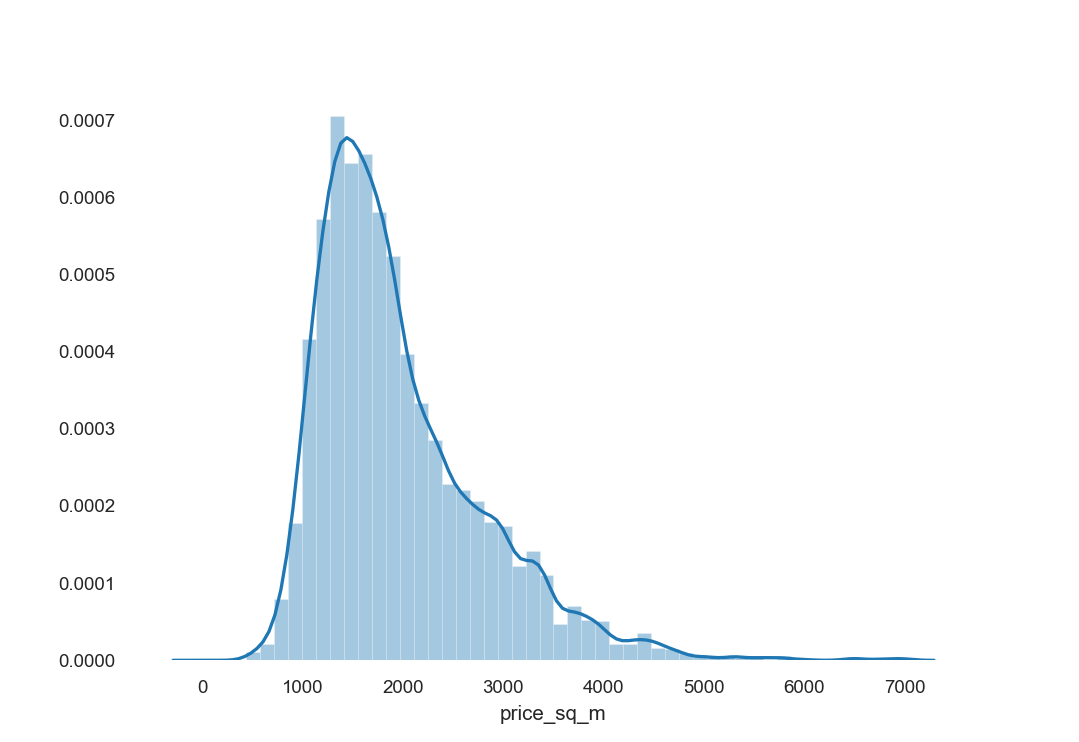

In [31]:
fig5 = plt.figure()
sns.distplot(df_raw['price_sq_m']);
plt.show()

<IPython.core.display.Javascript object>


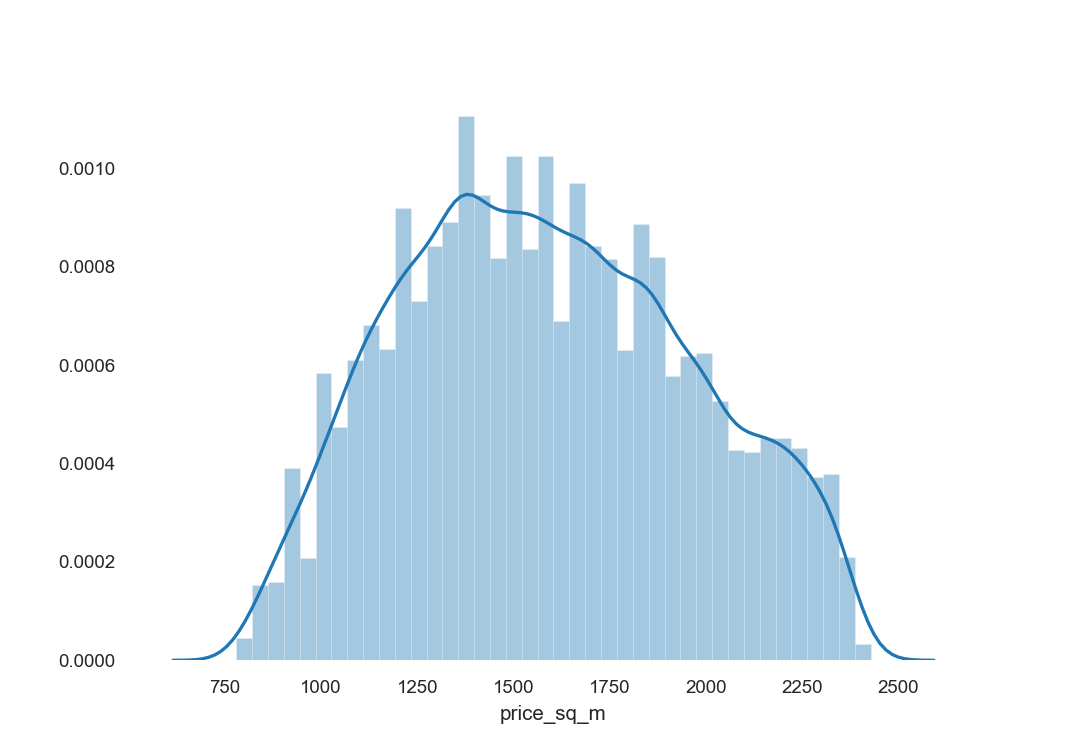

In [32]:
fig6 = plt.figure()
sns.distplot(df['price_sq_m']);
plt.show()

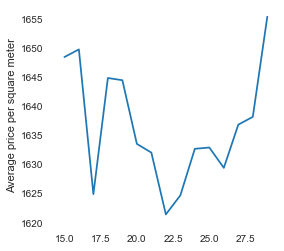

In [7]:
fig3 = plt.figure(figsize=(4,4))
plt.plot(df_agg['Mean'])
plt.ylabel('Average price per square meter')
#axes = plt.gca()
#axes.set_xlim([0,2500])SS
#axes.set_ylim([1800,1850])
plt.show()

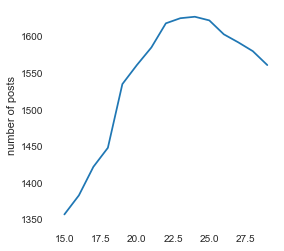

In [8]:
fig4 = plt.figure(figsize=(4,4))
plt.plot(df_agg['nr_objects'])
plt.ylabel('number of posts')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([1500,2200])
plt.show()

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_agg.index,
    y=df_agg['Mean']
))

fig.add_trace(go.Scatter(
    x=df_agg.index,
    y=df_agg['Mean']
))

fig.update_layout(
    title="Plot Title",
    showlegend=False,
    annotations=[
        dict(
            x=15,
            y=1648,
            xref="x",
            yref="y",
            text="Nationwide quarantine extended to April 27th.",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),  dict(
            x=25,
            y=1633,
            xref="x",
            yref="y",
            text="The nationwide quarantine is lifted",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
        
    ]
     ,xaxis = dict(
        tickmode = 'linear',
        tick0 = 15,
        dtick = 1)
#      ,yaxis = dict(
#         tickmode = 'linear',
#         tick0 = 1600,
#         dtick = 5)        
    
)


fig.show()

In [14]:
import plotly.graph_objects as go
import numpy as np

title = 'Main Source for News'
labels = ['Television', 'Newspaper', 'Internet', 'Radio']
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']

mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

x_data = np.vstack((np.arange(2001, 2014),)*4)

y_data = np.array([
    [74, 82, 80, 74, 73, 72, 74, 70, 70, 66, 66, 69],
    [45, 42, 50, 46, 36, 36, 34, 35, 32, 31, 31, 28],
    [13, 14, 20, 24, 20, 24, 24, 40, 35, 41, 43, 50],
    [18, 21, 18, 21, 16, 14, 13, 18, 17, 16, 19, 23],
])

fig = go.Figure()

for i in range(0, 4):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    # endpoints
    fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[11],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[11]),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Main Source for News',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()